In [2]:
#importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

#Importar base de datos
df = pd.read_csv("base_de_datos_precio_viviendas.csv", delimiter=";")
print (df.head())

   MSSubClass MSZoning  LotArea LotConfig Neighborhood  YearBuilt  \
0          60       RL     8450    Inside      CollgCr       2003   
1          20       RL     9600       FR2      Veenker       1976   
2          60       RL    11250    Inside      CollgCr       2001   
3          70       RL     9550    Corner      Crawfor       1915   
4          60       RL    14260       FR2      NoRidge       2000   

   TotalBsmtSF  GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  \
0          856       1710         2             1             8         548   
1         1262       1262         2             1             6         460   
2          920       1786         2             1             6         608   
3          756       1717         1             1             7         642   
4         1145       2198         2             1             9         836   

   YrSold  SalePrice  
0    2008     208500  
1    2007     181500  
2    2008     223500  
3    2006     1400

                             Descripción de la base de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   LotArea       1460 non-null   int64 
 3   LotConfig     1460 non-null   object
 4   Neighborhood  1460 non-null   object
 5   YearBuilt     1460 non-null   int64 
 6   TotalBsmtSF   1460 non-null   int64 
 7   GrLivArea     1460 non-null   int64 
 8   FullBath      1460 non-null   int64 
 9   KitchenAbvGr  1460 non-null   int64 
 10  TotRmsAbvGrd  1460 non-null   int64 
 11  GarageArea    1460 non-null   int64 
 12  YrSold        1460 non-null   int64 
 13  SalePrice     1460 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 159.8+ KB


La base de datos no presenta datos faltantes y esta compuesta por 3 variables categóricas, 10 numéricas y 1 variables cuantificada que es MSSubClass.

In [4]:
df.shape

(1460, 14)

Tiene 1460 filas y 14 colum

In [5]:
df.describe()

,MSSubClass,LotArea,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,KitchenAbvGr,TotRmsAbvGrd,GarageArea,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,1971.267808,1057.429452,1515.463699,1.565068,1.046575,6.517808,472.980137,2007.815753,180921.195890
std,42.300571,9981.264932,30.202904,438.705324,525.480383,0.550916,0.220338,1.625393,213.804841,1.328095,79442.502883
min,20.000000,1300.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,1954.000000,795.750000,1129.500000,1.000000,1.000000,5.000000,334.500000,2007.000000,129975.000000
50%,50.000000,9478.500000,1973.000000,991.500000,1464.000000,2.000000,1.000000,6.000000,480.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,2000.000000,1298.250000,1776.750000,2.000000,1.000000,7.000000,576.000000,2009.000000,214000.000000
max,190.000000,215245.000000,2010.000000,6110.000000,5642.000000,3.000000,3.000000,14.000000,1418.000000,2010.000000,755000.000000


In [6]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
Neighborhood    0
YearBuilt       0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageArea      0
YrSold          0
SalePrice       0
dtype: int64

In [7]:
df.nunique()

MSSubClass        15
MSZoning           5
LotArea         1073
LotConfig          5
Neighborhood      25
YearBuilt        112
TotalBsmtSF      721
GrLivArea        861
FullBath           4
KitchenAbvGr       4
TotRmsAbvGrd      12
GarageArea       441
YrSold             5
SalePrice        663
dtype: int64

                                 Visualización de las variables
                                           categóricas

<Axes: xlabel='MSSubClass', ylabel='count'>

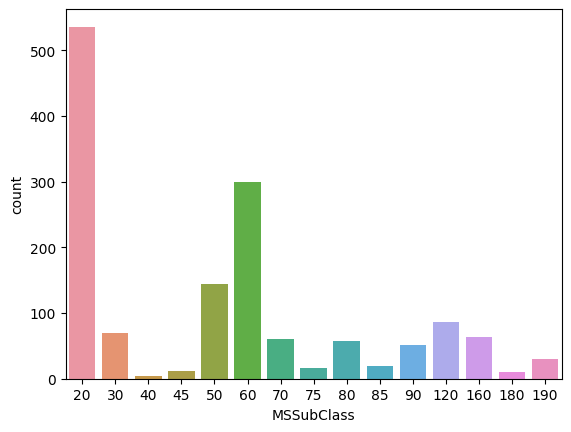

In [8]:
sns.countplot(x="MSSubClass",data=df)


Podemos evidenciar que la variable que más se repite cuando se quiere explicar el tipo de construcción de la vivienda (MSSubClass) es "1-STORY 1946 & NEWER ALL STYLES" (20), y la segunda es "2-STORY 1946 & NEWER" (60).

<Axes: xlabel='MSZoning', ylabel='count'>

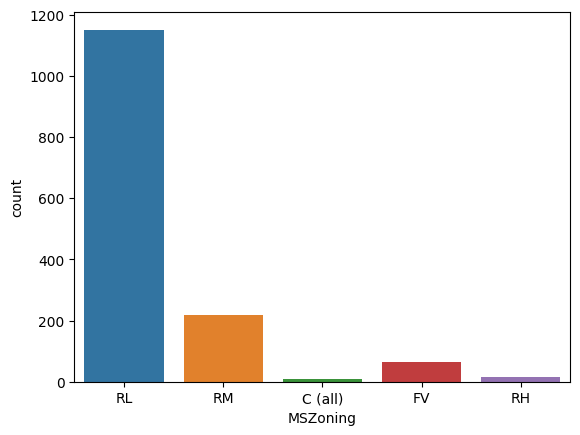

In [9]:

sns.countplot(x="MSZoning",data=df)

Podemos evidenciar que la variable que más se repite cuando se quiere explicar la clasificación general de zonificación (MSZoning) es "Zona reciencial de baja densidad" (RL), y la que menos se repite es "Zona comercial" (C).

<Axes: xlabel='LotConfig', ylabel='count'>

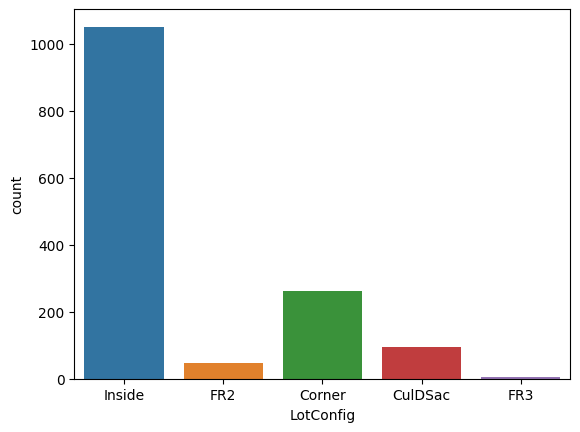

In [10]:

sns.countplot(x="LotConfig",data=df)

Podemos evidenciar que la variable que más se repite cuando se quiere explicar la configuración del lote es "Lote interior" (Inside), y la que menos se repite con muy pocos valores es "en frente a 3 sides de la propiedad" (FR3).

<Axes: xlabel='Neighborhood', ylabel='count'>

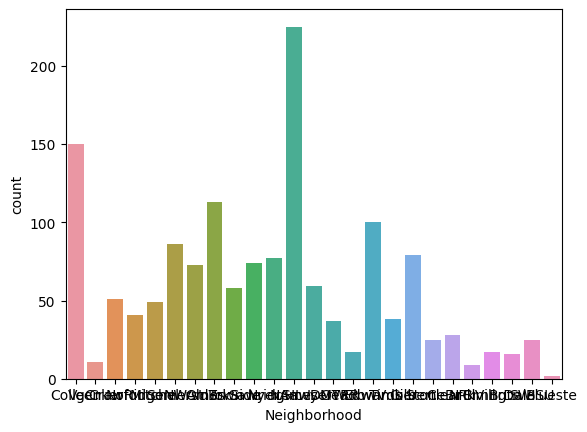

In [11]:
sns.countplot(x="Neighborhood",data=df)



In [12]:
df["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

Podemos evidenciar que la variable que más se repite cuando se quiere explicar las ubicaciones físicas dentro de los límites de la ciudad es "Norte de AMES" (NAmes), y la que menos se repite con muy pocos valores (2) es "Bluestem" (Blueste).

                                 Visualización de las variables 
                                numéricas y tratamiento de outliers                   

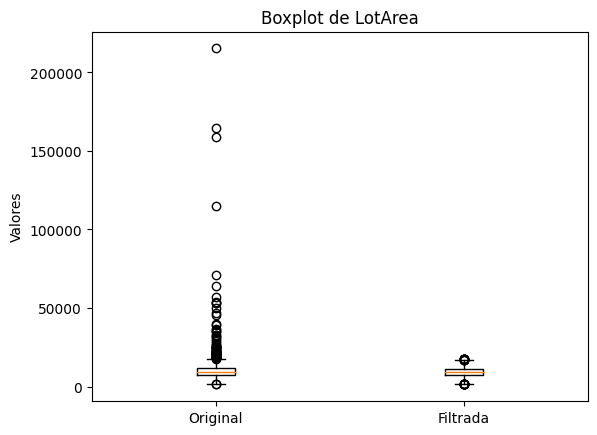

In [13]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'LotArea'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

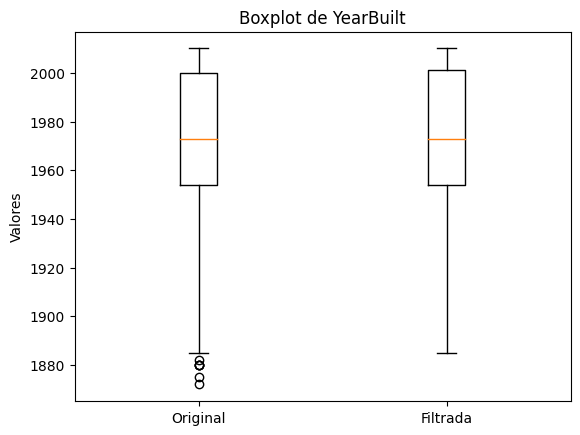

In [14]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'YearBuilt'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered_1 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_1[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

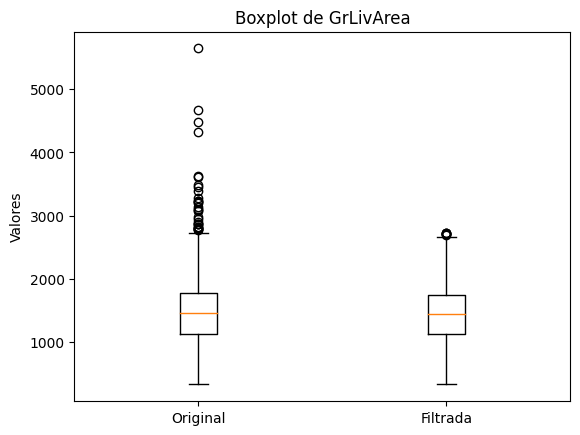

In [15]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'GrLivArea'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_2 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_2[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

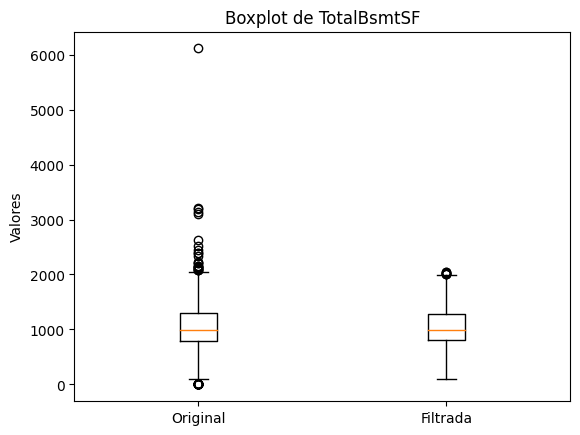

In [16]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'TotalBsmtSF'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_3 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_3[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

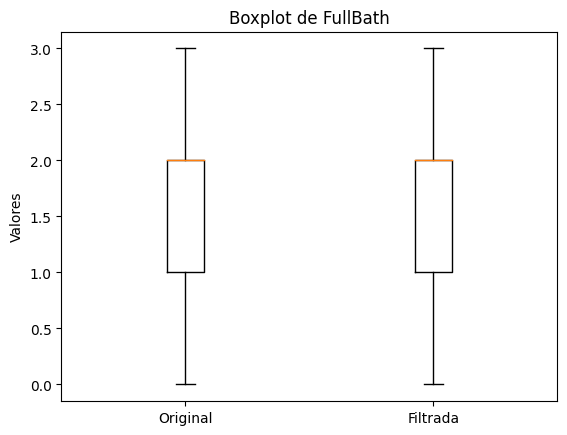

In [17]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'FullBath'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_4 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_4[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

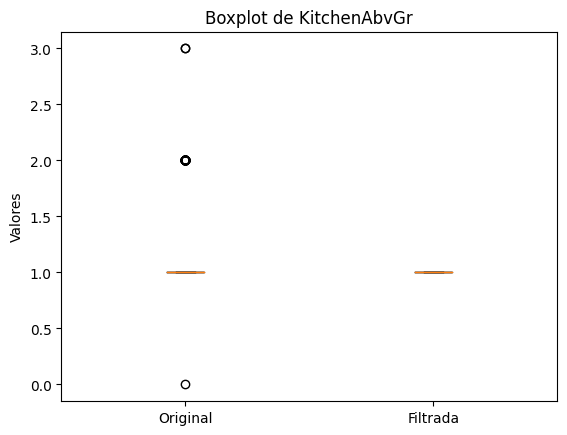

In [18]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'KitchenAbvGr'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_5 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_5[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

In [19]:
df["KitchenAbvGr"].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

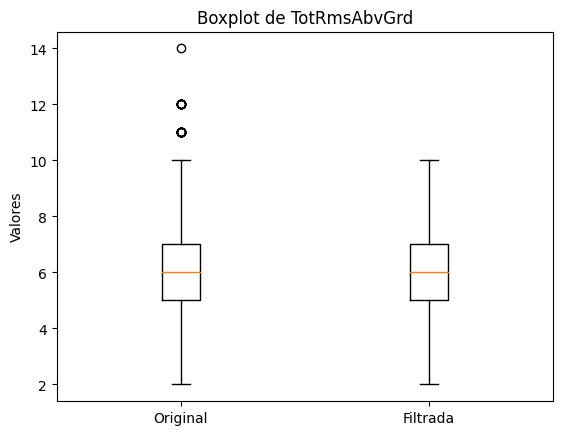

In [20]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'TotRmsAbvGrd'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_6 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_6[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

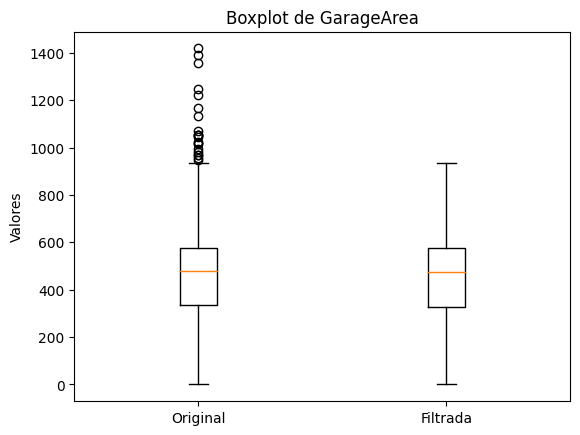

In [21]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest= 'GarageArea'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_7 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_7[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

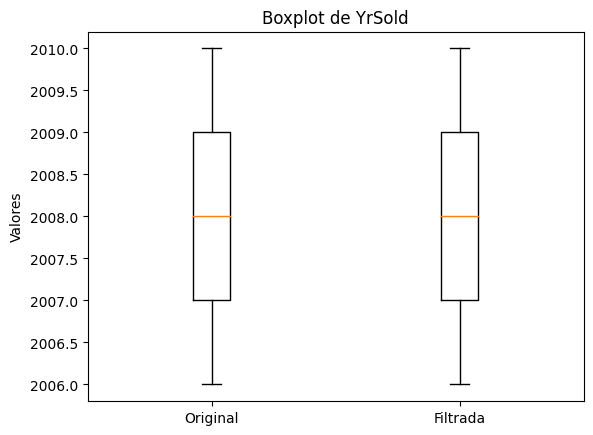

In [22]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'YrSold'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_8 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_8[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

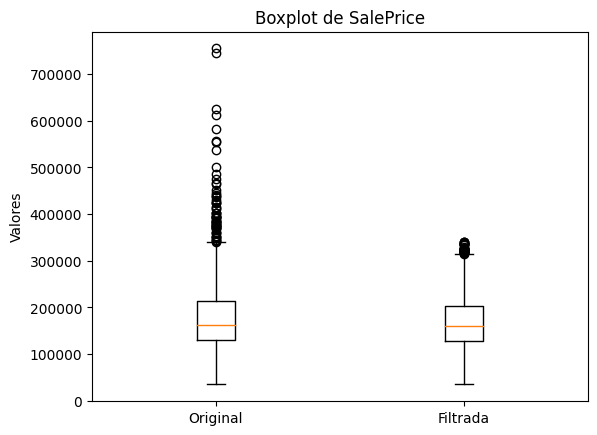

In [23]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'SalePrice'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtra los datos para eliminar los outliers
data_filtered_9 = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered_9[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

Correlaciones

array([[<Axes: xlabel='MSSubClass', ylabel='MSSubClass'>,
        <Axes: xlabel='LotArea', ylabel='MSSubClass'>,
        <Axes: xlabel='YearBuilt', ylabel='MSSubClass'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='MSSubClass'>,
        <Axes: xlabel='GrLivArea', ylabel='MSSubClass'>,
        <Axes: xlabel='FullBath', ylabel='MSSubClass'>,
        <Axes: xlabel='KitchenAbvGr', ylabel='MSSubClass'>,
        <Axes: xlabel='TotRmsAbvGrd', ylabel='MSSubClass'>,
        <Axes: xlabel='GarageArea', ylabel='MSSubClass'>,
        <Axes: xlabel='YrSold', ylabel='MSSubClass'>,
        <Axes: xlabel='SalePrice', ylabel='MSSubClass'>],
       [<Axes: xlabel='MSSubClass', ylabel='LotArea'>,
        <Axes: xlabel='LotArea', ylabel='LotArea'>,
        <Axes: xlabel='YearBuilt', ylabel='LotArea'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='LotArea'>,
        <Axes: xlabel='GrLivArea', ylabel='LotArea'>,
        <Axes: xlabel='FullBath', ylabel='LotArea'>,
        <Axes: xlabel='KitchenAbvGr', ylabel

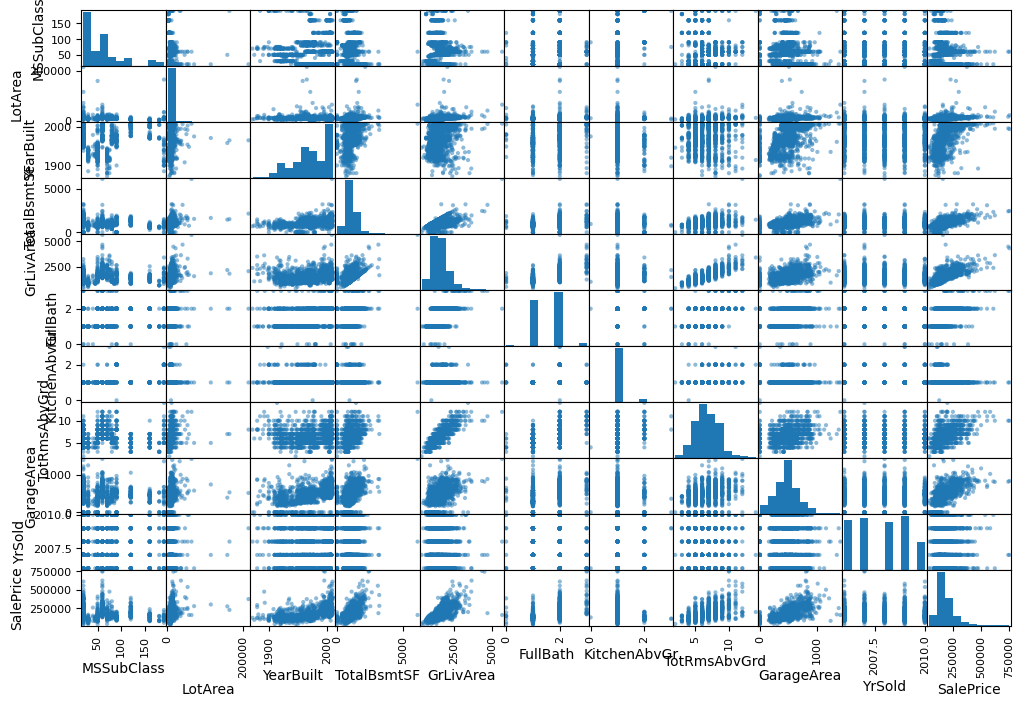

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["MSSubClass","MSZoning","LotArea","LotConfig","Neighborhood","YearBuilt",
              "TotalBsmtSF","GrLivArea","FullBath","KitchenAbvGr","TotRmsAbvGrd",
              "GarageArea","YrSold","SalePrice"]
scatter_matrix(df[attributes], figsize=(12, 8))